# Explore here

In [10]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.exceptions import NotFittedError


# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv', sep=",")
df.head()





,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS EN EL DATASET SON {numeros_duplicados}")

LOS NUMEROS DUPLICADOS EN EL DATASET SON 1


In [14]:
# ELIMINAMOS LO NUMEROS DUPLICADOS
df = df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [16]:
# CONTAMOS CUANTOS NaN EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS
nan_counts = df.isnull().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

CONTEO DE LOS 'NaN' POR COLUMNAS:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---------------ANALISIS UNIVARIANTE------------------
ANALISIS UNIVARIANTE CATEGORICAS


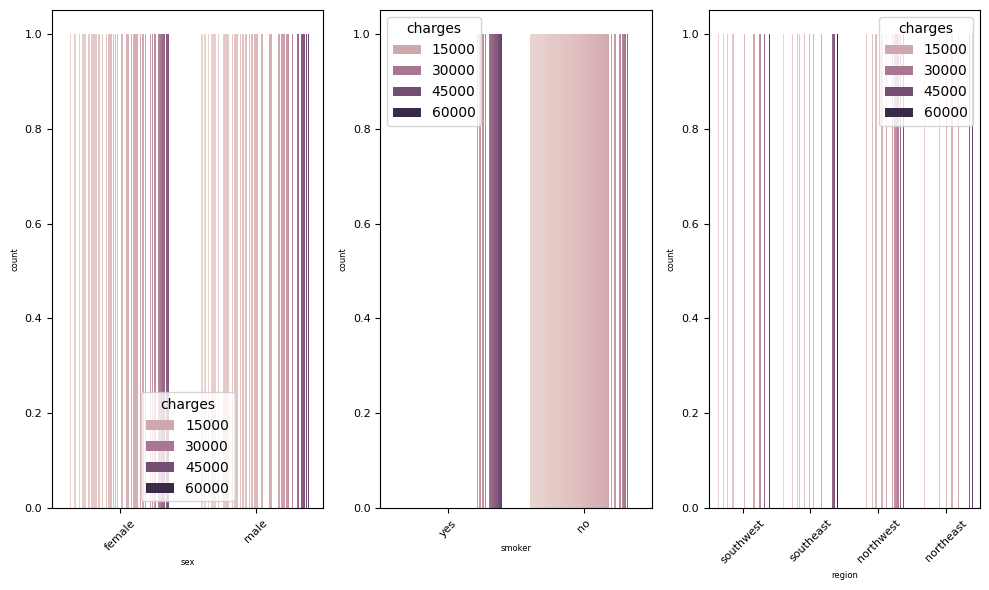

In [21]:
print("---------------ANALISIS UNIVARIANTE------------------\nANALISIS UNIVARIANTE CATEGORICAS")


df.sex.value_counts()
df.smoker.value_counts()
df.region.value_counts()
fig, axis = plt.subplots(1, 3, figsize = (10, 6))
sns.countplot(ax = axis[0], data = df, x = "sex", hue = "charges")
sns.countplot(ax = axis[1], data = df, x = "smoker", hue = "charges")
sns.countplot(ax = axis[2], data = df, x = "region", hue = "charges")

for ax in axis.flatten(): 
    if ax is not None: 
        ax.set_xlabel(ax.get_xlabel(), fontsize=6) 
        ax.set_ylabel(ax.get_ylabel(), fontsize=6) 
        ax.set_title(ax.get_title(), fontsize=6) 
        ax.tick_params(axis='x', rotation=45, labelsize=8) 
        ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()

plt.show()

ANALISIS UNIVARIANTE DE NUMERICAS


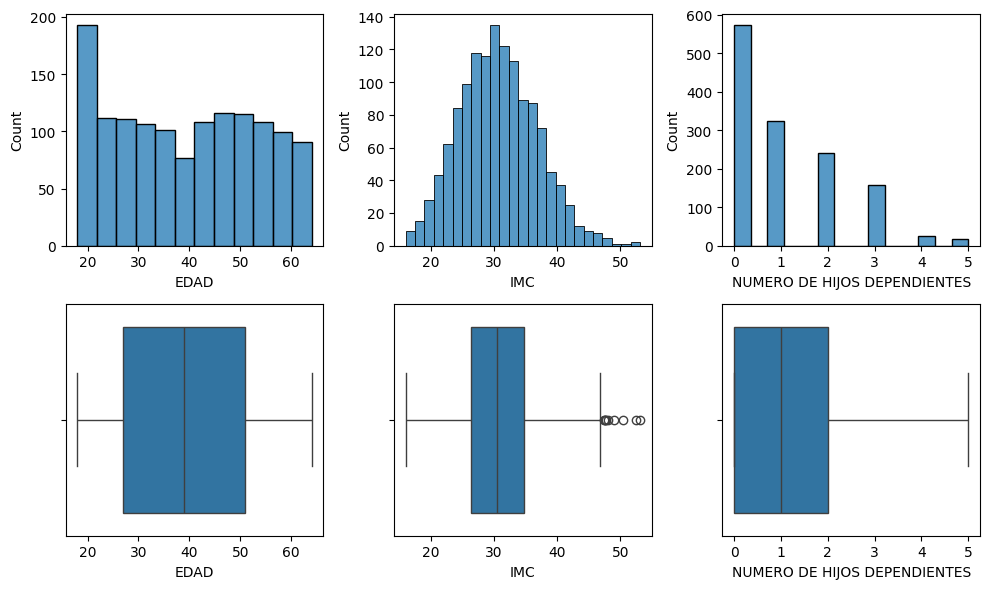

In [22]:
print("ANALISIS UNIVARIANTE DE NUMERICAS")
fig, axis = plt.subplots(2, 3, figsize = (10, 6))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = "EDAD")
sns.boxplot(ax = axis[1, 0], data = df, x = "age").set(xlabel = "EDAD")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = "IMC")
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi").set(xlabel= "IMC")

sns.histplot(ax = axis[0, 2], data = df, x = "children").set(xlabel = "NUMERO DE HIJOS DEPENDIENTES")
sns.boxplot(ax = axis[1, 2], data = df, x = "children").set(xlabel="NUMERO DE HIJOS DEPENDIENTES")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

---------------ANALISIS MULTIVARIANTE------------------
ANALISIS NUMERICO-NUMERICO


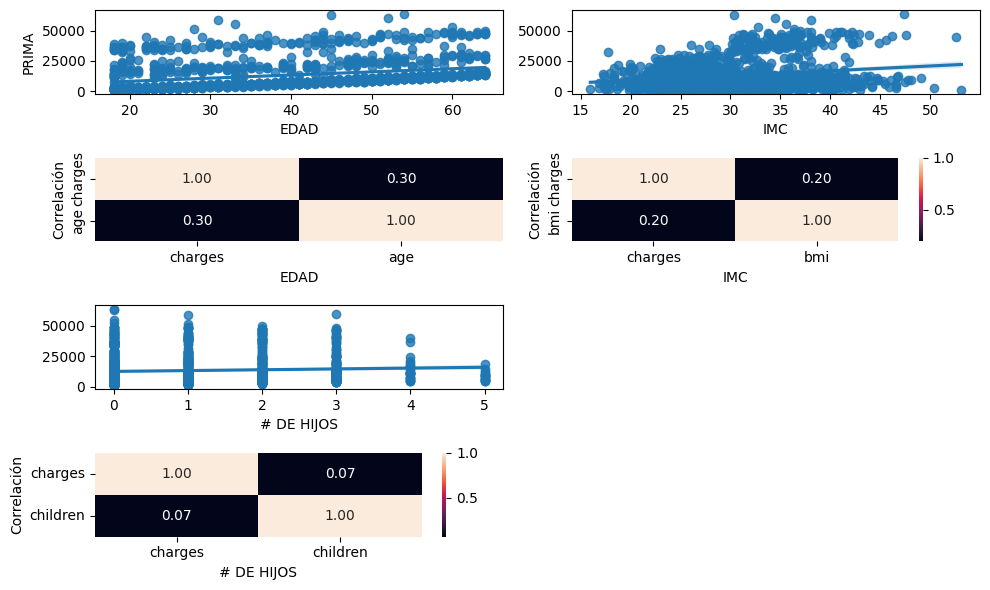

In [25]:
print("---------------ANALISIS MULTIVARIANTE------------------\nANALISIS NUMERICO-NUMERICO")
fig, axis = plt.subplots(4, 2, figsize=(10, 6))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0, 0], data=df, x="age", y="charges")
axis[0, 0].set_xlabel("EDAD")
axis[0, 0].set_ylabel("PRIMA")

sns.heatmap(df[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_xlabel("EDAD")
axis[1, 0].set_ylabel("Correlación")

sns.regplot(ax=axis[0, 1], data=df, x="bmi", y="charges").set(ylabel=None)
axis[0, 1].set_xlabel("IMC")

sns.heatmap(df[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
axis[1, 1].set_xlabel("IMC")
axis[1, 1].set_ylabel("Correlación")

sns.regplot(ax=axis[2, 0], data=df, x="children", y="charges").set(ylabel=None)
axis[2, 0].set_xlabel("# DE HIJOS")

sns.heatmap(df[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])
axis[3, 0].set_xlabel("# DE HIJOS")
axis[3, 0].set_ylabel("Correlación")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [28]:
df["sex_fact"] = pd.factorize(df["sex"])[0]
df["smoker_fact"] = pd.factorize(df["smoker"])[0]
df["region_fact"] = pd.factorize(df["region"])[0]
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_fact,smoker_fact,region_fact
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)
CORRELACION DE TODAS LAS VARIABLES


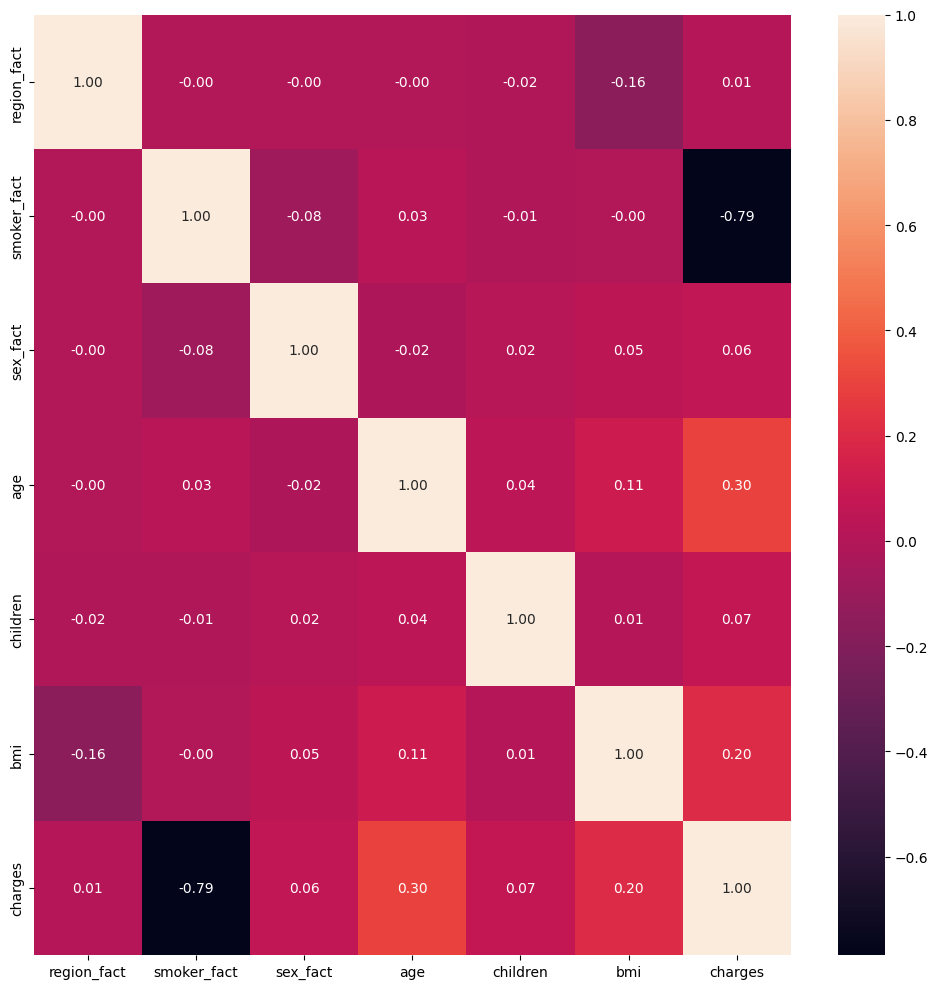

In [29]:
print("-----------------ANALISIS NUMERICO - CATEGORICO (ANALISIS COMPLETO)\nCORRELACION DE TODAS LAS VARIABLES")
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["region_fact", "smoker_fact", "sex_fact", "age", "children", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

EXISTE UNA FUERTA RELACION NEGATIVA ENTRE SER FUMADOR Y LA PRIMA Y UNA RELACION POSITIVA ENTRE LA EDAD Y LA PRIMA.

----------------VALORES ATIPICOS-----------------



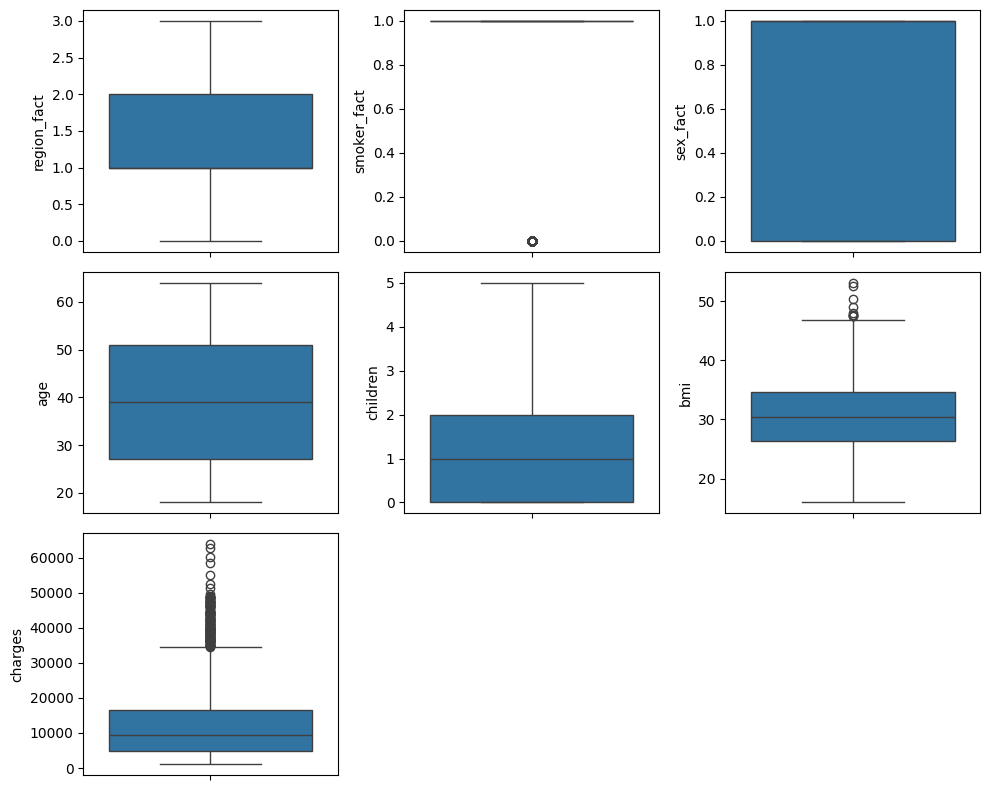

In [30]:
print("----------------VALORES ATIPICOS-----------------\n")
fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "region_fact")
sns.boxplot(ax = axis[0, 1], data = df, y = "smoker_fact")
sns.boxplot(ax = axis[0, 2], data = df, y = "sex_fact")
sns.boxplot(ax = axis[1, 0], data = df, y = "age")
sns.boxplot(ax = axis[1, 1], data = df, y = "children")
sns.boxplot(ax = axis[1, 2], data = df, y = "bmi")
sns.boxplot(ax = axis[2, 0], data = df, y = "charges")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()

In [39]:
""" ESTE CÓDIGO TE PERMITIRÁ NO SOLO IDENTIFICAR Y VISUALIZAR LOS OUTLIERS EN CADA 
 UNA DE LAS VARIABLES ESPECIFICADAS, SINO TAMBIÉN CONTAR CUÁNTOS DATOS ATÍPICOS 
 HAY EN CADA CASO. SI NECESITAS MÁS AJUSTES O TIENES MÁS PREGUNTAS, ¡ESTOY AQUÍ 
 PARA AYUDAR"""


# Supongamos que df es tu DataFrame ya cargado
variables = ["smoker_fact", "bmi", "charges"]

for var in variables:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"ATRIBUTO: {var}")
    print(f"LOS LIMITES SUPERIORES E INFERIORES PARA LA BUSQUEDA DE OUTLIERS SON: {round(upper_limit, 2)} Y {round(lower_limit, 2)}, CON UN RANGO INTERCUARTÌLICO DE {round(IQR, 2)}\n")

    # Filtrar datos atípicos en la variable iterada según el upper_limit calculado
    var_atipica = df[df[var] >= upper_limit]
    num_outliers = var_atipica.shape[0]  # Contar el número de datos atípicos
    print(f"Datos atípicos en {var}:\n", var_atipica.head())
    print(f"NUMERO TOTAL DE DATOS ATIPICOS EN {var}: {num_outliers}\n")


ATRIBUTO: smoker_fact
LOS LIMITES SUPERIORES E INFERIORES PARA LA BUSQUEDA DE OUTLIERS SON: 1.0 Y 1.0, CON UN RANGO INTERCUARTÌLICO DE 0.0

Datos atípicos en smoker_fact:
    age     sex     bmi  children smoker     region      charges  sex_fact  \
1   18    male  33.770         1     no  southeast   1725.55230         1   
2   28    male  33.000         3     no  southeast   4449.46200         1   
3   33    male  22.705         0     no  northwest  21984.47061         1   
4   32    male  28.880         0     no  northwest   3866.85520         1   
5   31  female  25.740         0     no  southeast   3756.62160         0   

   smoker_fact  region_fact  
1            1            1  
2            1            1  
3            1            2  
4            1            2  
5            1            1  
NUMERO TOTAL DE DATOS ATIPICOS EN smoker_fact: 1063

ATRIBUTO: bmi
LOS LIMITES SUPERIORES E INFERIORES PARA LA BUSQUEDA DE OUTLIERS SON: 47.32 Y 13.67, CON UN RANGO INTERCUARTÌLICO DE 8

In [44]:
# ELIMINAMOS LAS COLUMNAS FACTORIZADAS
df.drop(["sex_fact", "smoker_fact", "region_fact"], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
print("------------------DIVISION EN TRAIN Y TEST DE LOS DATOS--------------------------\n")
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

------------------DIVISION EN TRAIN Y TEST DE LOS DATOS--------------------------



,age,sex,bmi,children,smoker,region
1114,23,male,24.510,0,no,northeast
968,21,male,25.745,2,no,northeast
599,52,female,37.525,2,no,northwest
170,63,male,41.470,0,no,southeast
275,47,female,26.600,2,no,northeast


In [47]:
# DEFINO LAS VARIABLES CATEGORICAS Y NUMERICAS
variables_categoricas = ['sex', 'smoker', 'region']
variables_numericas = ['age', 'bmi', 'children']

In [48]:

X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

print("-------------------CODIFICACION DE VARIABLES CATEGORICAS-------------------\nUTILIZO LABEL ENCODING") 
# instancio el encoder para cada variable categórica 
label_encoders = {} 
for var in variables_categoricas: 
    le = LabelEncoder() 
    X_train_cat_le[var + '_le'] = le.fit_transform(X_train[var]) 
    X_test_cat_le[var + '_le'] = le.transform(X_test[var]) 
    label_encoders[var] = le 
# Eliminar las columnas categóricas originales después de la codificación 
X_train_cat_le = X_train_cat_le.drop(columns=variables_categoricas) 
X_test_cat_le = X_test_cat_le.drop(columns=variables_categoricas) 
X_train_cat_le.head()

-------------------CODIFICACION DE VARIABLES CATEGORICAS-------------------
UTILIZO LABEL ENCODING


,age,bmi,children,sex_le,smoker_le,region_le
1114,23,24.510,0,1,0,0
968,21,25.745,2,1,0,0
599,52,37.525,2,0,0,1
170,63,41.470,0,1,0,2
275,47,26.600,2,0,0,0


In [49]:
print("--------------------ESCALADO DE VARIABLES NUMERICAS\nUTILIZO STANDARSCALER") 
# Instancio el escalador 
scaler = StandardScaler() 
# Entreno el escalador con los datos de entrenamiento 
scaler.fit(X_train[variables_numericas]) 

# Aplico el escalador en ambos 
X_train_num_scal = scaler.transform(X_train[variables_numericas]) 
X_train_num_scal = pd.DataFrame(X_train_num_scal, index=X_train.index, columns=[var + '_scaled' for var in variables_numericas]) 

X_test_num_scal = scaler.transform(X_test[variables_numericas]) 
X_test_num_scal = pd.DataFrame(X_test_num_scal, index=X_test.index, columns=[var + '_scaled' for var in variables_numericas]) 

X_train_num_scal.head()

--------------------ESCALADO DE VARIABLES NUMERICAS
UTILIZO STANDARSCALER


,age_scaled,bmi_scaled,children_scaled
1114,-1.157680,-0.996928,-0.907908
968,-1.300619,-0.792762,0.766904
599,0.914926,1.154664,0.766904
170,1.701087,1.806837,-0.907908
275,0.557580,-0.651417,0.766904


In [50]:
print("-----------UNIFICAMOS EL DATASET PREPROCESADO HASTA EL MOMENTO----------------") 
# Combinar los DataFrames escalados y codificados 
X_train_final = pd.concat([X_train_num_scal, X_train_cat_le], axis=1) 
X_test_final = pd.concat([X_test_num_scal, X_test_cat_le], axis=1) 

# Eliminar las columnas numéricas originales 
X_train_final = X_train_final.drop(columns=variables_numericas) 
X_test_final = X_test_final.drop(columns=variables_numericas) 

X_train_final

-----------UNIFICAMOS EL DATASET PREPROCESADO HASTA EL MOMENTO----------------


,age_scaled,bmi_scaled,children_scaled,sex_le,smoker_le,region_le
1114,-1.157680,-0.996928,-0.907908,1,0,0
968,-1.300619,-0.792762,0.766904,1,0,0
599,0.914926,1.154664,0.766904,0,0,1
170,1.701087,1.806837,-0.907908,1,0,2
275,0.557580,-0.651417,0.766904,0,0,0
...,...,...,...,...,...,...
1096,0.843457,0.730628,0.766904,0,1,0
1131,-0.871804,2.539188,0.766904,1,0,3
1295,-1.372088,-1.411872,-0.070502,1,0,3
861,-0.085643,-0.419974,1.604310,0,0,3


In [51]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, 1114 to 1127
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age_scaled       1069 non-null   float64
 1   bmi_scaled       1069 non-null   float64
 2   children_scaled  1069 non-null   float64
 3   sex_le           1069 non-null   int64  
 4   smoker_le        1069 non-null   int64  
 5   region_le        1069 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 58.5 KB


In [53]:
print("----------------REALIZAMOS LA SELECCION DE LAS MEJORES 5 VARIABLES------------------") 
# Con un valor de k = 5
selection_model = SelectKBest(score_func=f_classif, k=5) 

# Entreno la selección 
try: 
    selection_model.fit(X_train_final, y_train) 
except NotFittedError as e: 
    print(f"Error al ajustar SelectKBest: {e}") 
# Transformo los datos con el modelo ajustado 
ix = selection_model.get_support() 
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns=X_train_final.columns.values[ix]) 
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns=X_test_final.columns.values[ix]) 
X_train_sel.head()

----------------REALIZAMOS LA SELECCION DE LAS MEJORES 5 VARIABLES------------------


/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,bmi_scaled,children_scaled,sex_le,smoker_le,region_le
0,-0.996928,-0.907908,1.0,0.0,0.0
1,-0.792762,0.766904,1.0,0.0,0.0
2,1.154664,0.766904,0.0,0.0,1.0
3,1.806837,-0.907908,1.0,0.0,2.0
4,-0.651417,0.766904,0.0,0.0,0.0


In [54]:
print("-------------OBTENEMOS LAS CARACTERISTICAS SELECCIONADAS-------------------")
# Obtener las características seleccionadas
selected_features = X_train_final.columns[selection_model.get_support()]

selected_features

-------------OBTENEMOS LAS CARACTERISTICAS SELECCIONADAS-------------------


Index(['bmi_scaled', 'children_scaled', 'sex_le', 'smoker_le', 'region_le'], dtype='object')

In [58]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


ValueError: Could not interpret value `bmi_scaled` for `x`. An entry with this name does not appear in `data`.

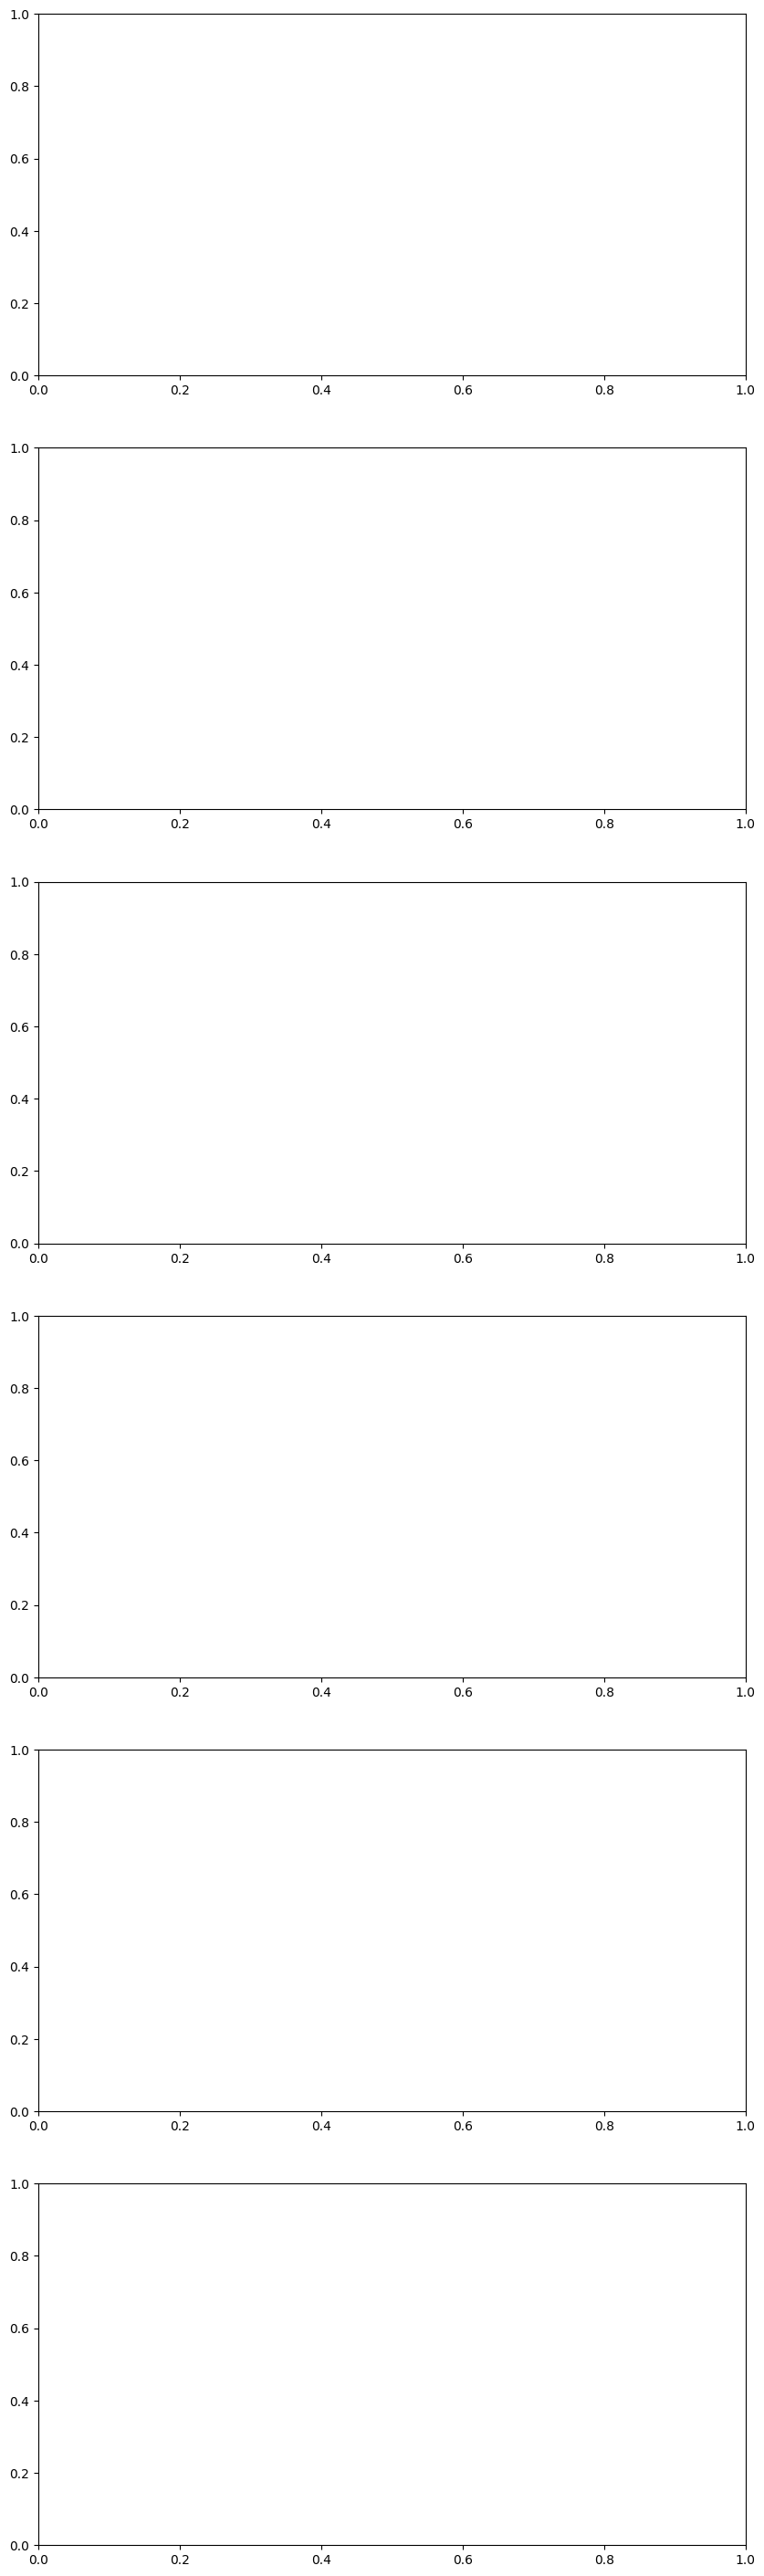

In [ ]:
# Supongamos que df es tu DataFrame ya cargado
variables_predictoras = ['bmi_scaled', 'children_scaled', 'sex_le', 'smoker_le', 'region_le']
target = 'charges'

# Crear el gráfico combinado
fig, axs = plt.subplots(len(variables_predictoras) + 1, 1, figsize=(10, 6 * (len(variables_predictoras) + 1)))

# Crear diagramas de puntos para cada variable predictora contra la variable objetivo
for i, var in enumerate(variables_predictoras):
    sns.scatterplot(data=df, x=var, y=target, ax=axs[i])
    axs[i].set_title(f'Scatter Plot of {var} vs {target}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel(target)

# Crear una matriz de correlación para el mapa de calor
correlation_matrix = df[variables_predictoras + [target]].corr()

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[-1])
axs[-1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()
